In [2]:
# Importing the important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Defining the lorenz system
def lorenz(t, XYZ, sigma, rho, beta):
    x, y, z = XYZ
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

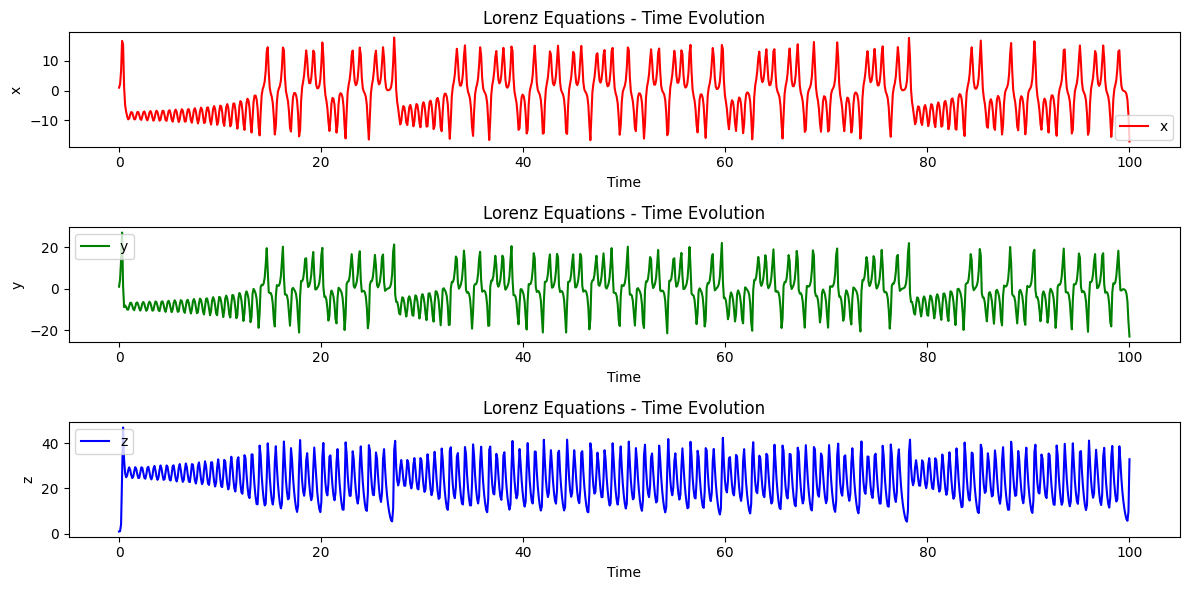

In [4]:
# Showing the space trajectories

# Solve the system using solve_ivp
solution = solve_ivp(lorenz, (0, 100), [1, 1, 1], args=(10, 28, 8/3), dense_output=True)

# Evaluate the solution at specific time points
t_eval = np.linspace(0, 100, 1000)
XYZ_solution = solution.sol(t_eval)

# Plotting x, y, and z in three separate plots
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t_eval, XYZ_solution[0], 'r', label='x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Lorenz Equations - Time Evolution')

plt.subplot(3, 1, 2)
plt.plot(t_eval, XYZ_solution[1], 'g', label='y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Lorenz Equations - Time Evolution')

plt.subplot(3, 1, 3)
plt.plot(t_eval, XYZ_solution[2], 'b', label='z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Lorenz Equations - Time Evolution')

plt.tight_layout()
plt.show()

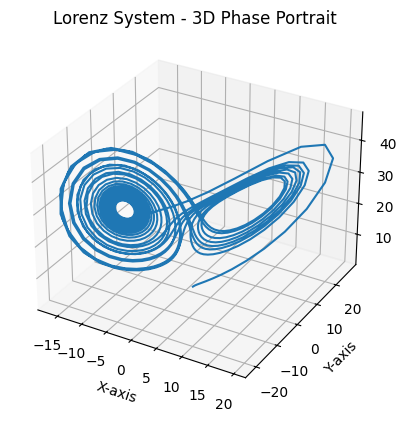

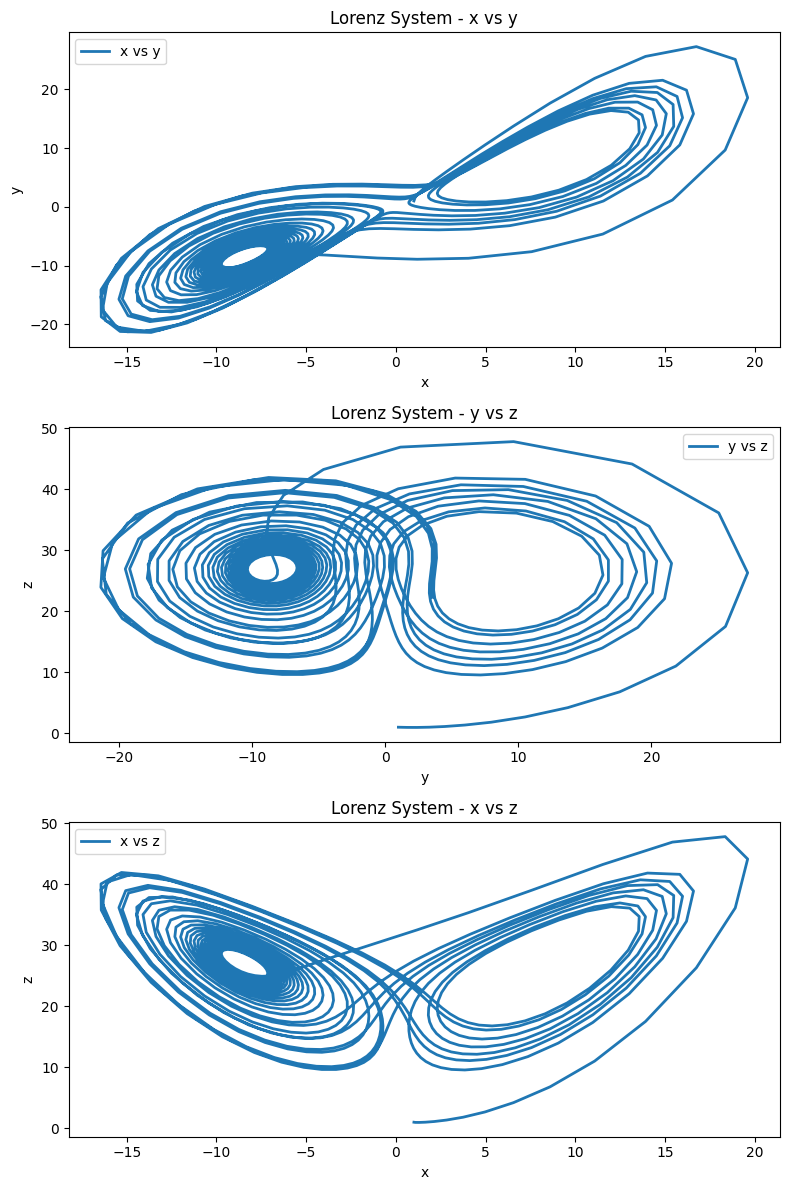

In [5]:
# Phase portraits

# Solve the system using solve_ivp
solution = solve_ivp(lorenz, (0, 25), [1, 1, 1], args=(10,28,8/3), dense_output=True)

# Evaluate the solution at specific time points
XYZ_solution = solution.sol(np.linspace(0, 25, 1000))

# Plotting the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(XYZ_solution[0], XYZ_solution[1], XYZ_solution[2], label='Lorenz System')
ax.set_title('Lorenz System - 3D Phase Portrait')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

# Plotting 2D phase portraits
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(XYZ_solution[0], XYZ_solution[1], label='x vs y', linewidth=2)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Lorenz System - x vs y')
axes[0].legend()

axes[1].plot(XYZ_solution[1], XYZ_solution[2], label='y vs z', linewidth=2)
axes[1].set_xlabel('y')
axes[1].set_ylabel('z')
axes[1].set_title('Lorenz System - y vs z')
axes[1].legend()

axes[2].plot(XYZ_solution[0], XYZ_solution[2], label='x vs z', linewidth=2)
axes[2].set_xlabel('x')
axes[2].set_ylabel('z')
axes[2].set_title('Lorenz System - x vs z')
axes[2].legend()

plt.tight_layout()
plt.show()


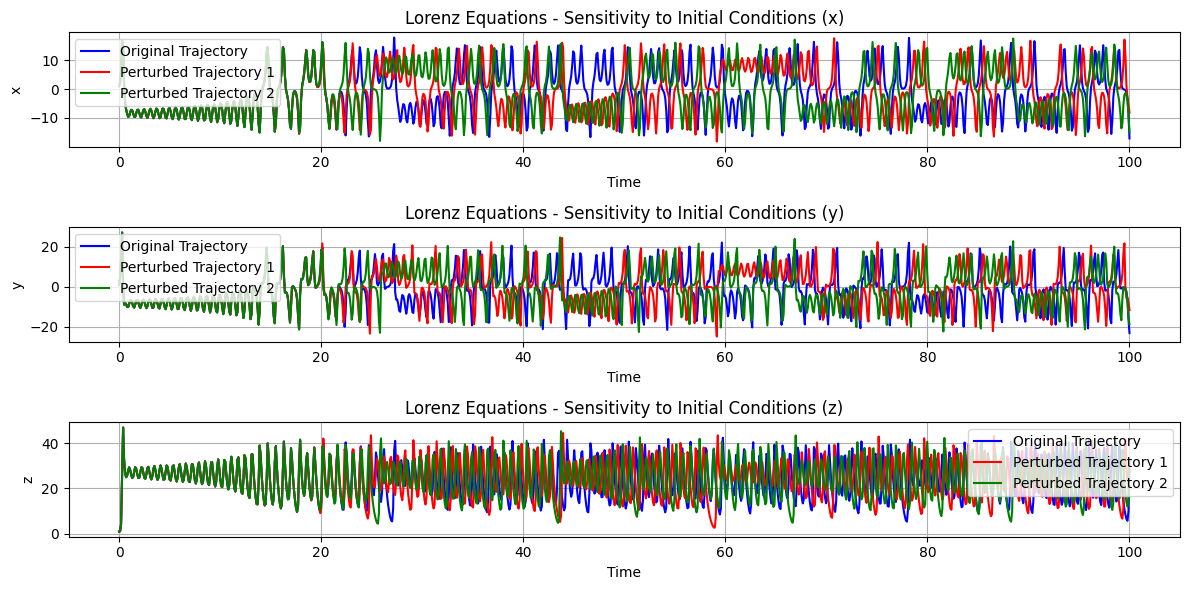

In [6]:
# Sensitivity to initial conditions

# Solve the system for the original and perturbed initial conditions
epsilon = 1e-3
initial_conditions = [1,1,1]
perturbed_initial_conditions_1 = [initial_conditions[0] + epsilon, initial_conditions[1], initial_conditions[2]]
perturbed_initial_conditions_2 = [initial_conditions[0] - epsilon, initial_conditions[1], initial_conditions[2]]

# Solve the system using solve_ivp
t_span = np.linspace(0, 100, 1000)
solution_original = solve_ivp(lorenz, (0, 100), initial_conditions, args=(10, 28, 8/3), dense_output=True).sol(t_span)
solution_perturbed_1 = solve_ivp(lorenz, (0, 100), perturbed_initial_conditions_1, args=(10, 28, 8/3), dense_output=True).sol(t_span)
solution_perturbed_2 = solve_ivp(lorenz, (0, 100), perturbed_initial_conditions_2, args=(10, 28, 8/3), dense_output=True).sol(t_span)


# Plotting sensitivity to initial conditions
fig = plt.figure(figsize=(12, 6))

# x vs t
plt.subplot(3, 1, 1)
plt.plot(t_span, solution_original[0], 'b', label='Original Trajectory')
plt.plot(t_span, solution_perturbed_1[0], 'r', label='Perturbed Trajectory 1')
plt.plot(t_span, solution_perturbed_2[0], 'g', label='Perturbed Trajectory 2')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Lorenz Equations - Sensitivity to Initial Conditions (x)')
plt.legend()
plt.grid(True)

# y vs t
plt.subplot(3, 1, 2)
plt.plot(t_span, solution_original[1], 'b', label='Original Trajectory')
plt.plot(t_span, solution_perturbed_1[1], 'r', label='Perturbed Trajectory 1')
plt.plot(t_span, solution_perturbed_2[1], 'g', label='Perturbed Trajectory 2')
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Lorenz Equations - Sensitivity to Initial Conditions (y)')
plt.legend()
plt.grid(True)

# z vs t
plt.subplot(3, 1, 3)
plt.plot(t_span, solution_original[2], 'b', label='Original Trajectory')
plt.plot(t_span, solution_perturbed_1[2], 'r', label='Perturbed Trajectory 1')
plt.plot(t_span, solution_perturbed_2[2], 'g', label='Perturbed Trajectory 2')
plt.xlabel('Time')
plt.ylabel('z')
plt.title('Lorenz Equations - Sensitivity to Initial Conditions (z)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


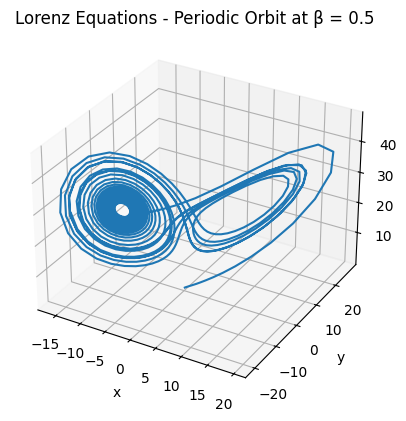

In [7]:
# 1 period cycle

# Part 4: Showing one periodic orbit at beta = 0.5
XYZ_beta_solution = solve_ivp(lorenz, (0, 100), [0.1,0.1,0.1], args=(10, 28, 8/3), dense_output=True).sol(np.linspace(0, 25, 1000))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(XYZ_beta_solution[0], XYZ_beta_solution[1], XYZ_beta_solution[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz Equations - Periodic Orbit at β = 0.5')
ax.grid(True)
plt.show()